#### Question 1
In class, we derived the posterior distribution for $p$, given an observation of three out of five heads. For that same coin, we then flip it another five times and observe exactly one head. What is the new posterior for $p$? (Hand calculation only, plot the resulting distribution). Is there anything intuitive about the result?

#### Solution 1
After observing three-of-five heads, the posterior for $p$ is $$pdf(p) = kp^3(1-p)^2$$ where $k$ is a constant. If we now observe another experiment that yields one-of-five heads, we can update this posterior using Bayes' Theorem:

$$pdf(p\ |\ \textrm{2nd observation}) = \frac{pr(\textrm{2nd observation}\ |\ p) \times kp^3(1-p)^2}{\textrm{constant}}$$

$$= \frac{p(1-p)^4 \cdot\ p^3(1-p)^2}{\textrm{constant}}$$

$$ = \frac{p^4(1-p)^6}{\textrm{constant}}$$

The constant has to be 2310 in order for the integral over $p$ to equal one.

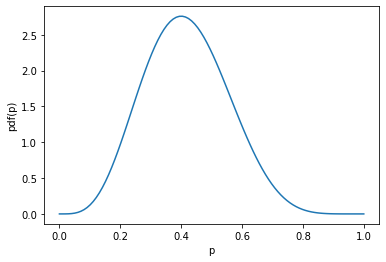

Note that the most likely value for $p$ is 0.4, which makes sense because in total we have observed four heads in ten trials. Note also that the posterior we computed is the same as if we had just done all ten observations at once instead of five and then five. The order of the observations doesn't matter.

#### Question 2
In class we derived the posterior distribution for $p$, given an observation of three out of five heads. For that same coin, we then flip it another five times and observe at least three more heads. What is the new posterior for $p$? (Hand calculation only, plot the resulting distribution). Is there anything intuitive about the result?

#### Solution 2
The probability of observing _at least_ 3 heads is the sum of the probabilities of observing 3, 4, and 5 heads:

$$pr( \textrm{heads}\ge 3\ |\ p) = 10p^3(1-p)^2 + 5p^4(1-p) + p^5$$

$$$$

Applying Bayes Theorem using a prior of $kp^3(1-p)^2$ yields:

$$pdf(p\ |\ \textrm{heads}\ge 3) = \frac{\Big(10p^3(1-p)^2 + 5p^4(1-p) + p^5 \Big)\Big(kp^3(1-p)^2\Big)}{\textrm{constant}}$$

$$$$

$$ = \frac{10p^6(1-p)^4 + 5p^7(1-p)^3 + p^8(1-p)^2}{\textrm{constant}}$$

Ignoring the constant term, we can plot this curve and find the most likely value of $p$ is 0.677.
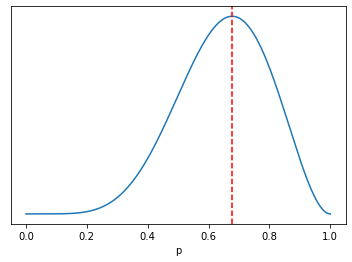

#### Question 3
Consider two random variables $x$ and $y$ defined over the range shown below. $f(x,y) = 1$ over the displayed range and zero for all other $x$'s and $y$'s. Solve for $E(x)$, $E(y)$, and the correlation of x and y. The correlation of x and y is a normalized version of the covariance - see equation 7.43 of the [Kay](https://www.ele.uri.edu/faculty/kay/New%20web/downloadable%20files/book_total.pdf) book.
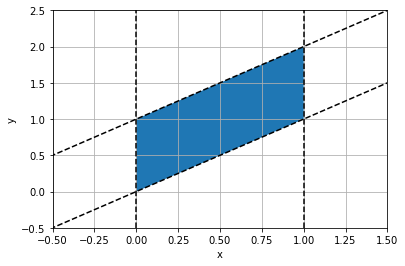

#### Solution 3
The easiest place to start is to get the marginal pdfs for x and y.

$$pdf(x) = \int_{x}^{x+1} 1\ dy = 1$$

Therefore the pdf for x is constant over the range $0 < x < 1$

$$pdf(y) = \int_{0}^{y} 1\ dx = y \qquad 0<y<1$$

$$pdf(y) = \int_{y-1}^{1} 1\ dx = 2-y \qquad 1<y<2$$

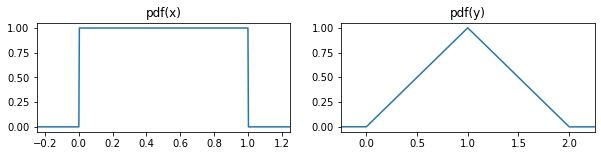

From here we can get the expectation and variance of both x and y using standard calculus:

$$E(x) = \int_0^1 x\cdot 1\ dx = 0.5$$

$$Var(x) = \int_0^1 (x-0.5)^2\ \cdot 1\ dx = 1/12$$

$$E(y) = \int_0^1 y\ \cdot y\ dy + \int_1^2 y\ \cdot (2-y)\ dy = 1$$

$$Var(y) = \int_0^1 (y-1)^2\ \cdot y\ dy + \int_1^2 (y-1)^2\ \cdot (2-y)\ dy = 1/6$$

We also need the E(xy):

$$E(xy) = \int_0^1 \int_{x}^{x+1} xy\ \cdot 1\ dy\ dx = 7/12$$

Now we can solve for the covariance easily enough:

$$\textrm{Cov(x,y)} = E(xy) - E(x)E(y) = 1/12$$

And finally the correlation:

$$\textrm{Corr(x,y)} = \frac{\textrm{Cov(x,y)}}{\sqrt{Var(x)}\sqrt{Var(y)}} = \frac{1}{\sqrt{2}} = 0.7$$

This is a fairly significant positive correlation between x and y, which makes sense looking at the picture. The larger x is, the more likely y is to also be large. In fact the only way to get to the largest value of y is to have the largest value of x! That's a positive correlation!

#### Simulation
It occurred to me that because the density f(x,y) is uniform, we can simulate these numbers fairly easily. Lets try, just for fun:

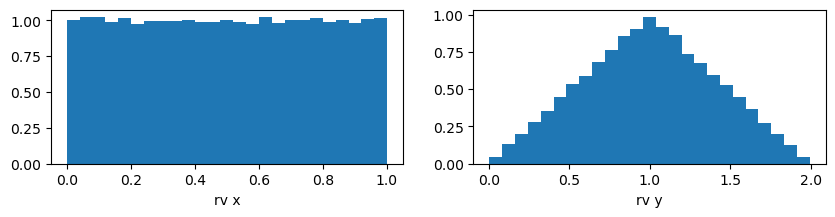

E(x)  =  0.500 	 Var(x) =  0.084
E(y)  =  0.999 	 Var(y) =  0.167
E(xy) =  0.583
Corr(x,y) =  0.707
[0.03577558 0.06992427 0.008278   ... 0.43256548 0.72613312 0.70687871]
[0.5953818  0.45223742 0.49087389 ... 1.1101272  0.83353882 1.11703819]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

n_pts = int(100e3)
x =     stats.uniform.rvs(size=n_pts)
y = x + stats.uniform.rvs(size=n_pts)

f,a = plt.subplots(1,2,figsize=(10,2))

a[0].hist(x,25,density = True), a[0].set_xlabel('rv x')
a[1].hist(y,25,density = True), a[1].set_xlabel('rv y')

plt.show()

print('E(x)  = ' , f"{x.mean():0.3f}" , "\t" , "Var(x) = " , f"{x.var():0.3f}" )
print('E(y)  = ' , f"{y.mean():0.3f}" , "\t" , "Var(y) = " , f"{y.var():0.3f}" )
print('E(xy) = ' , f"{(x*y).mean():0.3f}" )

print('Corr(x,y) = ' , f"{ np.corrcoef(x,y)[0,1] :0.3f}" )

print(x)
print(y)

#### Question 4
Consider the five random variables in the python data file [linked here](https://templeu.instructure.com/courses/117880/files/20332207?wrap=1). 
Which pair have the greatest correlation? (the matrix has 1 million rows and 5 columns).

In [2]:
import numpy as np
data = np.load('hw3.npy')

# compute covariances and variances
cov_mat = np.cov(data.T)

for i in range(5):
    for j in range(i+1,5):

        # normalize covariance to get correlation
        cor = cov_mat[i,j] / np.sqrt(cov_mat[i,i]*cov_mat[j,j])
        
        # print results
        print("col " , i , " vs col " , j , ": " , f"{cor:7.3f}")

col  0  vs col  1 :    0.134
col  0  vs col  2 :    0.231
col  0  vs col  3 :   -0.117
col  0  vs col  4 :   -0.219
col  1  vs col  2 :    0.016
col  1  vs col  3 :    0.068
col  1  vs col  4 :   -0.164
col  2  vs col  3 :   -0.039
col  2  vs col  4 :   -0.217
col  3  vs col  4 :    0.076


The greatest positive correlation is between columns 0 & 2 (0.231).
The greatest negative correlation is between columns 0 & 4 (-0.219).